In [1]:
import pandas as pd

In [2]:
#read the data
df = pd.read_csv('./California_housing_price_data.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
#check for nan values
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
#replace nan values with mean
df.fillna(df.mean(), inplace=True)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


1) Feature Selection:

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

# Define X and y variables
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','households', 'median_income']]
y = df[['median_house_value']]
# Select the top 2 features using chi2 test
selector = SelectKBest(chi2, k=2)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['total_rooms', 'total_bedrooms'], dtype='object')


2) Collinear Columns:

In [12]:
import numpy as np

# Define X variables
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','households', 'median_income', 'median_house_value','latitude', 'longitude']]
# Calculate correlation matrix
corr_matrix = np.corrcoef(X.T)

# Identify columns with correlation greater than 0.8
collinear_columns = [X.columns[i] for i in range(corr_matrix.shape[0]) if (corr_matrix[i,:] > 0.8).sum() > 1]
print(collinear_columns)

['total_rooms', 'total_bedrooms', 'households']


3) Lasso Regression:

[ 1.19926487e+03 -1.41761511e+01  1.34261848e+02 -4.40893808e+01
  4.19298045e+04 -4.11791107e+04 -4.26151151e+04]


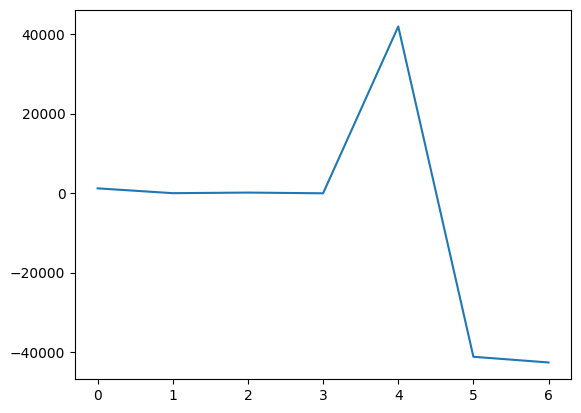

In [16]:
from sklearn.linear_model import Lasso

# Define X and y variables
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','households', 'median_income', 'latitude', 'longitude']]
y = df[['median_house_value']]

# Initialize Lasso model with alpha value of 0.1
lasso = Lasso(alpha=0.1)

# Fit the model to the data
lasso.fit(X, y)

# Print the coefficients of the features
print(lasso.coef_)
#plot the coefficients
import matplotlib.pyplot as plt
plt.plot(lasso.coef_)


4) Recursive Feature Elimination:

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define X and y variables
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','households', 'median_income', 'latitude', 'longitude']]
y = df[['median_house_value']]
# Initialize Linear Regression model
lr = LinearRegression()

# Create RFE object with 2 features to be selected
rfe = RFE(lr, n_features_to_select=2)

# Fit the RFE model to the data
rfe.fit(X, y)

# Get the selected feature names
selected_features = X.columns[rfe.get_support()]
print(selected_features)


Index(['latitude', 'longitude'], dtype='object')


5) Mutual Information:

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Define X and y variables
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','households', 'median_income', 'latitude', 'longitude']]
y = df[['median_house_value']]

# Select the top 2 features using mutual information test
selector = SelectKBest(mutual_info_regression, k=2)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)


c:\Users\ASUS\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['median_income', 'longitude'], dtype='object')


6) Principal Component Analysis:

[[-1836.81197904  -124.91993175]
 [ 4537.80814312  -222.25634601]
 [-1247.62924293  -185.89662395]
 ...
 [ -390.7469054      7.93750154]
 [ -800.20757763    -9.16819524]
 [  163.52162585    40.12447885]]


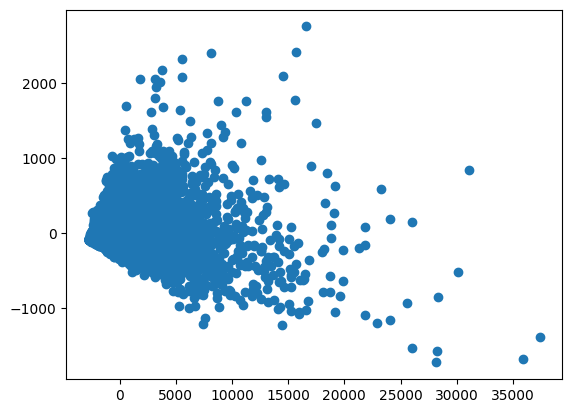

In [24]:
from sklearn.decomposition import PCA

X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','households', 'median_income', 'latitude', 'longitude']]

pca = PCA(n_components=2)

X_transformed = pca.fit_transform(X)
print(X_transformed)

#plot the transformed data
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.show()

7) Feature Importance

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Define X and y variables
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2)
print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [34]:
# Initialize Random Forest Classifier
rfc = RandomForestClassifier()

# Fit the model to the data
rfc.fit(X, y)

# Print the feature importance scores
print(rfc.feature_importances_)

[0.03233567 0.10300892 0.17113546 0.03582479 0.10209856 0.16777026
 0.11737581 0.03440321 0.13959609 0.09645123]


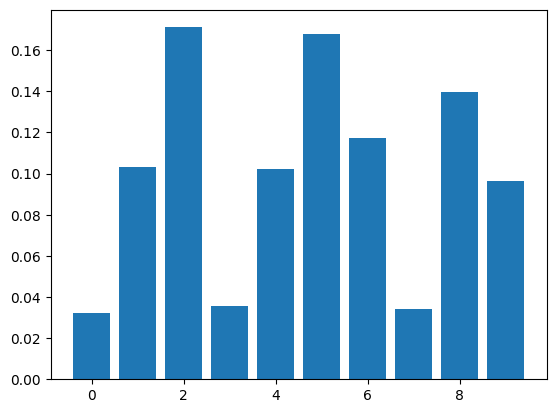

In [36]:
#plot the feature importance using bar plot
plt.bar([i for i in range(len(rfc.feature_importances_))], rfc.feature_importances_)
plt.show()

# The End